Selected Vehicle: Fisker Ocean Extreme
Total Cost: 62928.0


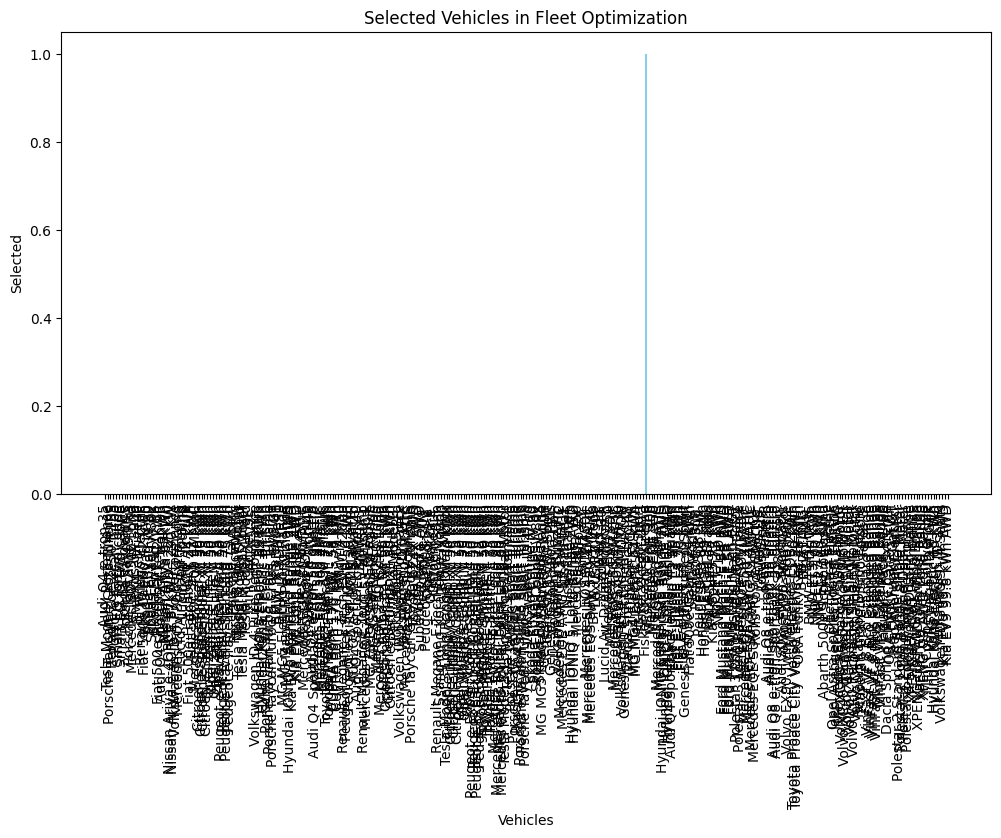


Conclusiones:
Los vehículos seleccionados cumplen con las restricciones y el costo total de la flota es óptimo.


In [1]:
#OPTIMIZACION OPTIMIZACION COSTO VEHICULO ELECTRICO

#Problema de Optimización:
#Dado el conjunto de vehículos eléctricos listados en el archivo, se desea minimizar el costo total de adquirir una 
#flota de vehículos que cumplan con ciertos requisitos de desempeño y características. Se deben seleccionar los vehículos 
#que minimicen el costo total de adquisición mientras se cumplen con las siguientes condiciones:
#1.	Al menos un vehículo debe tener una aceleración menor a 5 segundos.
#2.	La velocidad máxima de la flota debe ser mayor a 200 km/h.
#3.	La autonomía combinada de la flota debe ser mayor a 500 km.
#4.	Se debe garantizar que al menos un vehículo tenga tracción en las cuatro ruedas.
#5.	Se debe incluir al menos un vehículo con un precio en el rango de €50,000 a €70,000

import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, value
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
data = pd.read_csv("Cheapestelectriccars-EVDatabase 2023.csv")

# Convertir las columnas clave a numéricas y eliminar filas con valores NaN
data["PriceinGermany"] = pd.to_numeric(data["PriceinGermany"], errors='coerce')
data["TopSpeed"] = pd.to_numeric(data["TopSpeed"], errors='coerce')
data["Range"] = pd.to_numeric(data["Range"], errors='coerce')
data = data.dropna(subset=["PriceinGermany", "TopSpeed", "Range"])

# Crear el problema de optimización
model = LpProblem(name="Fleet_Optimization", sense=LpMinimize)

# Crear variables binarias para cada vehículo
vehicles = list(data.index)
x = LpVariable.dicts("Vehicle", vehicles, cat="Binary")

# Definir la función objetivo: Minimizar el costo total de la flota
model += lpSum(data["PriceinGermany"][i] * x[i] for i in vehicles)

# Restricciones
model += lpSum(x[i] for i in vehicles) >= 1
model += lpSum(data["TopSpeed"][i] * x[i] for i in vehicles) >= 200
model += lpSum(data["Range"][i] * x[i] for i in vehicles) >= 500
model += lpSum(x[i] for i in vehicles if "All Wheel Drive" in str(data["Drive"][i])) >= 1
model += lpSum(data["PriceinGermany"][i] * x[i] for i in vehicles) >= 50000
model += lpSum(data["PriceinGermany"][i] * x[i] for i in vehicles) <= 70000

# Resolver el problema
model.solve()

# Mostrar la solución
selected_vehicles = [i for i in vehicles if x[i].varValue == 1]
for i in selected_vehicles:
    print(f"Selected Vehicle: {data['Name'][i]}")

total_cost = model.objective.value()
print(f"Total Cost: {total_cost}")

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.bar(data['Name'], [x[i].varValue for i in vehicles], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Vehicles')
plt.ylabel('Selected')
plt.title('Selected Vehicles in Fleet Optimization')
plt.show()

# Conclusiones
print("\nConclusiones:")
print("Los vehículos seleccionados cumplen con las restricciones y el costo total de la flota es óptimo.")
